In [93]:

import numpy as np
import re
import json
import gzip
from collections import defaultdict


In [20]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz

--2021-09-18 10:28:33--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495854086 (473M) [application/x-gzip]
Saving to: ‘reviews_Electronics_5.json.gz.1’

reviews_Electronics 100%[===================>] 472.88M  6.58MB/s    in 1m 53s  

2021-09-18 10:30:26 (4.19 MB/s) - ‘reviews_Electronics_5.json.gz.1’ saved [495854086/495854086]



In [94]:
file = 'reviews_Electronics_5.json.gz' 
content = []
duplicate = []
with gzip.open(file,'rb') as input:
  for line in input:
    line =line.rstrip()
    if line:
      if len(content)==50000:
          break
      instance=json.loads(line)
      content.append(instance['reviewText'])
      
     

In [ ]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [95]:
data = [re.sub(r'[,!?;-]', '.', review) for review in content]      
for i in data:
  for j in i.split("."):
    # token=sent_tokenize(i)
    # for j in token:
        strip_val=j.strip()
        if strip_val:
            duplicate.append(j.strip())
data=duplicate 
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
data=[tokenizer.tokenize(sent) for sent in data]
print(data[:5])

[['We', 'got', 'this', 'GPS', 'for', 'my', 'husband', 'who', 'is', 'an', 'OTR', 'over', 'the', 'road', 'trucker'], ['Very', 'Impressed', 'with', 'the', 'shipping', 'time'], ['it', 'arrived', 'a', 'few', 'days', 'earlier', 'than', 'expected'], ['within', 'a', 'week', 'of', 'use', 'however', 'it', 'started', 'freezing', 'up'], ['could', 'of', 'just', 'been', 'a', 'glitch', 'in', 'that', 'unit']]


In [96]:
tokenizing=[] # converting to lower case
for sent in data:
  inst=[]
  for word in sent:
    inst.append(word.lower())
  tokenizing.append(inst)
data=tokenizing  
print(data[:5])


[['we', 'got', 'this', 'gps', 'for', 'my', 'husband', 'who', 'is', 'an', 'otr', 'over', 'the', 'road', 'trucker'], ['very', 'impressed', 'with', 'the', 'shipping', 'time'], ['it', 'arrived', 'a', 'few', 'days', 'earlier', 'than', 'expected'], ['within', 'a', 'week', 'of', 'use', 'however', 'it', 'started', 'freezing', 'up'], ['could', 'of', 'just', 'been', 'a', 'glitch', 'in', 'that', 'unit']]


In [97]:




def Remove_Frequency(data):
  Retu=[]
  for i in data:
    current=[token for token in i if Frequency[token]>5]

    if len(current)>0:
      Retu.append(current)
  return Retu
Frequency = defaultdict(int)
def Frequencies(data):
  for i in data:
    for token in i:
      Frequency[token]+=1

Frequencies(data)
data = Remove_Frequency(data)
# print(data)

In [98]:
Word2Index=defaultdict(list)
Index2Word=defaultdict(list)
assign=0    
import pickle
training_data=[]
for i in Frequency:
   if Frequency[i]>5:
     Word2Index[i]=assign
     Index2Word[assign]=i
     assign+=1
     
     
V=len(Word2Index)
for i in Frequency:
  if Frequency[i]>5:
    arr=np.zeros(V)
    arr[Word2Index[i]]=1
    training_data.append([0,np.zeros(V),arr])
embedding = {i:Word2Index[i] for i in Word2Index}
file = open("cbowword2index.pkl","wb")
pickle.dump(embedding,file)
file.close()
embedding = {i:Index2Word[i] for i in Index2Word}
file = open("cbowindex2word.pkl","wb")
pickle.dump(embedding,file)
file.close()

def OnehotEncode(word):
   vector=np.zeros(V)
   vector[Word2Index[word]]+=1
   return vector    
   # 1. storing ind2word
# embedding = [i for i in ind2word]
# file = open("./drive/MyDrive/advNLP/q2/ind2word.pkl","wb")
# i2w = { i:ind2word[i] for i in ind2word}
# pickle.dump(i2w,file)
# file.close()

In [99]:
window=2
epoches=-1

def get_vectors(batch_size):# using mini-batch gradient descent
  # for k in range(epoches):
  global epoches 
  while True: #cyclic tha data from end to start
    epoches+=1
    print("epoches",epoches)# increasing the epoches in my case atmax 1
    for sent in data:
      for i in range(0,len(sent)):
        w_context=np.zeros(V)
        w_target=np.zeros(V)
        w_target[Word2Index[sent[i]]]=1
        mean=0
        range1=max(0,i-window)
        range2=min(i+window+1,len(sent))
        for j in range(range1,range2):
          if i != j:
            mean+=1
            w_context[Word2Index[sent[j]]]+=1
            

            # training_data[Word2Index[sent[i]]][0]+=1
            # training_data[Word2Index[sent[i]]][1][Word2Index[sent[j]]]+=1
            # mean+=1
        if mean:
          w_context/=mean   
        # print(sent)   
        yield w_context,w_target   
        # if mean:
        # w_context/=mean
      # training_data.append([w_target,w_context])  

def get_batches(batch_size):
  batch_target=[]
  batch_context=[]
  for x,y in get_vectors(batch_size):
    # print(len(batch_context))
    if len(batch_context) == batch_size:
      yield np.array(batch_context),np.array(batch_target)
      batch_target=[]
      batch_context=[]    
    else:
      batch_context.append(x)
      batch_target.append(y)
       

# for x,y in get_batches(4):
#   print(x,len(x))
#   print("b/w")
#   print(y)
#   print("New")










In [33]:
def softmax(x):
  e_x=np.exp(x)
  return e_x/np.sum(e_x,axis=0)


def Forward(x,W1,W2):
  h=np.dot(x,W1)
  u=np.dot(h,W2) 
  # print(h.shape,len(u))
  y_c = softmax(u.T)
  return y_c.T,(h),(u)

# from google.colab import drive
# drive.mount("/content/drive")

In [100]:

def gradient_descent(itrator):
  print("call")
  itr=0
  # W1,W2=Fill_Model(100,V)
  W1=np.random.rand(V,100)
  W2=np.random.rand(100,V)
  # print(W1)
  print("shjds")
  loss=0
  rate=0.035
  batch_size=64 # mini batch gradeint descent
  for x,y in get_batches(batch_size):
    # print("enter")
    itr+=1
    yhat,h,u=Forward(x,W1,W2)
    # print(x.shape)
    # print(xhat)
    # val=softmax(xhat)
    Error = yhat-y
    # costs.append(compute_cost(y,yhat,batch_size))
    # print(itr)
    # print(compute_cost(y,yhat,batch_size))
    gradientw2=np.dot(h.T,Error)/batch_size
    gradientw1=np.dot(x.T,np.dot(Error,W2.T))/batch_size

    W1-=rate*gradientw1
    W2-=rate*gradientw2
    if itr==itrator:
      break
    if itr%1000 == 0:
      embedding =[i for i in W2.T]
      file=open("/content/drive/MyDrive/NLP FILES/w2.pkl","wb")
      pickle.dump(embedding,file)
      file.close()
      embedding =[i for i in W1]
      file=open("/content/drive/MyDrive/NLP FILES/w1.pkl","wb")
      pickle.dump(embedding,file)
      file.close()
      
      print(itr)
      # rate*=0.66  
    # print(h.shape,u.shape,xhat.shape)

    # break


  return  W1,W2

W1,W2=gradient_descent(50000)




call
shjds
epoches 0


KeyboardInterrupt: ignored

In [90]:
print(W2.T)

[[ 0.08255061  0.44876893  0.57683691 ...  0.89109392  0.65707641
   0.84209658]
 [ 0.87881913  0.54588261  1.05536762 ...  1.00316988  0.4038158
   0.40632424]
 [ 0.40278132  1.86606251 -0.05215437 ...  1.0071451   1.22524043
   0.40373701]
 ...
 [ 0.63279094  0.2193403   0.65122751 ...  0.2375107   0.08364716
   0.13125818]
 [ 0.49425567  0.97923299  0.89215602 ...  0.12593617  0.56575238
   0.07676293]
 [ 0.53854937  0.46448644  0.00973174 ...  0.74110158  0.19301253
   0.85406673]]


In [91]:
print(W1)

[[ 0.75186443  0.41850058  0.89211453 ...  0.74302744  0.55598913
   0.64451353]
 [ 0.7136843   0.3711604   0.85683559 ...  0.64227402  0.84386508
   0.07133452]
 [-0.08098728 -0.67644333  1.26822801 ...  0.59386807  0.11086793
   0.90998563]
 ...
 [ 0.3711174   0.89528545  0.51881144 ...  0.97388147  0.43153978
   0.2483679 ]
 [ 0.92147568  0.75274706  0.56646993 ...  0.66040271  0.59710011
   0.17667065]
 [ 0.01574273  0.92403705  0.52144182 ...  0.50715713  0.35687806
   0.23562386]]


In [79]:
# # def back(yi ,weight2 ,y ,size ): 
# #   gradientb1 = np.sum(np.dot(weight2.T,yi-y), axis = 1, keepdims = True) / size
# #   gradientb2 = np.sum(yi - y, axis = 1, keepdims = True) / size

# #   return gradientb1,gradientb2

# # def softmax(ui):
# #   return np.exp(ui)/np.sum(np.exp(ui),axis=0)  
# def gradient_descent(itrator,w1,w3):
#   print("call")
#   itr=0
#   W1,W2=w1,w3
#   # print(W1)
#   print("shjds")
#   loss=0
#   rate=0.035
#   batch_size=64 # mini batch gradeint descent
#   for x,y in get_batches(batch_size):
#     # print("enter")
#     itr+=1
#     yhat,h,u=Forward(x,W1,W2)
#     # print(x.shape)
#     # print(xhat)
#     # val=softmax(xhat)
#     Error = yhat-y
#     # costs.append(compute_cost(y,yhat,batch_size))
#     # print(itr)
#     # print(compute_cost(y,yhat,batch_size))
#     gradientw2=np.dot(h.T,Error)/batch_size
#     gradientw1=np.dot(x.T,np.dot(Error,W2.T))/batch_size

#     W1-=rate*gradientw1
#     W2-=rate*gradientw2
#     if itr==itrator:
#       break
#     if itr%1000 == 0:
#       embedding =[i for i in W2.T]
#       file=open("/content/drive/MyDrive/NLP FILES/w2.pkl","wb")
#       pickle.dump(embedding,file)
#       file.close()
#       embedding =[i for i in W1]
#       file=open("/content/drive/MyDrive/NLP FILES/w1.pkl","wb")
#       pickle.dump(embedding,file)
#       file.close()
      
#       print(itr)
#   return W1,W2    

# W1,W2=gradient_descent(10000,W1,W2)

call
shjds
epoches 2
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [ ]:
# count=0
# size=100
# def gradeint_descent(rate=.1):
#   global count
#   W1,W2,b1,b2=Fill_Model(size,V)
#   # count=0
#   batch=128
#   for x,y in get_training_data(batch):
#     print("yes")
#     h=np.dot(W1,x)+b1
#     u=np.dot(W2,h)+b2
#     yi=softmax(u)
#     gra_b1,gra_b2=back(yi,W2,y,batch)
#     gradientw1=np.dot(np.dot(W2.T,yi-y),x.T)/batch
#     gradientw2=np.dot(yi-y,h.T)/batch

#     b1-=rate*gra_b1
#     b2-=rate*gra_b2
#     if count > 1000:
#       break
#     W1-=rate*gradientw1
#     W2-=rate*gradientw2
    

   
#     print("count" , count)  
#     count+=1
#     # print(count)
#   return W1, W2


In [ ]:
# W1, W2=gradeint_descent(.1)
# print(count)

In [ ]:
# W1
print(len(W2))
import os
# model = (U)
# np.savetxt(fname="cbow.csv", delimiter=",", X=W2.T)
output=[]
import math
from scipy import spatial
def cosine_similarity_calc(vec_1,vec_2):
	
	sim = np.dot(vec_1,vec_2)/(np.linalg.norm(vec_1)*np.linalg.norm(vec_2))
	
	return sim
# print(W1[0])
# print(W1[Word2Index['camera']]) 
# print()
# print(W1[Word2Index['we']]) 
# print(cosine_similarity_calc(W1[Word2Index['camera']],W1[Word2Index['we']]))
for i in range(0,len(W2.T)):
  # print(W2.T[i])
  Angle=cosine_similarity_calc(W2.T[Word2Index['slr']],W2.T[i])
  output.append([Angle,(Index2Word[i])])

output.sort(reverse=True)
for i in range(10):
  print(output[i][0])
for i in range(10):
  print(output[i][1])  

print(output[:30])
print(Word2Index['lens'])
# /content/sample_data



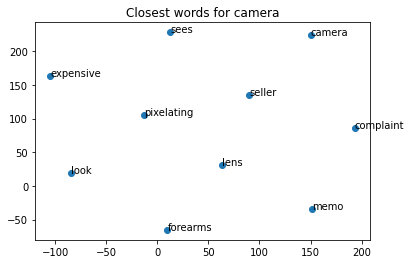

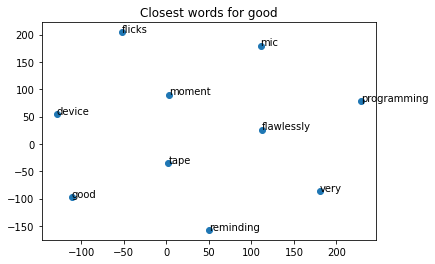

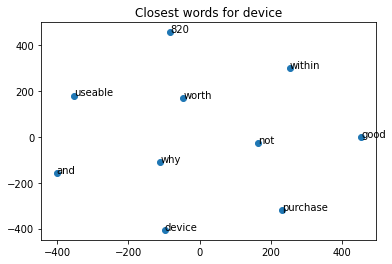

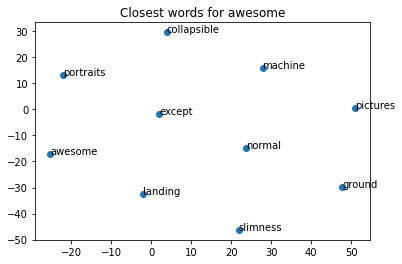

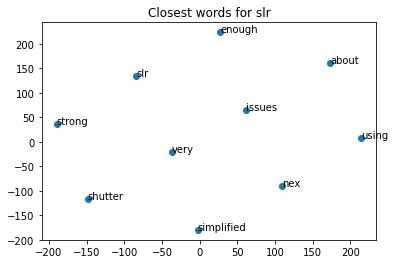

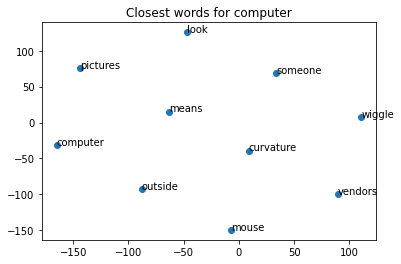

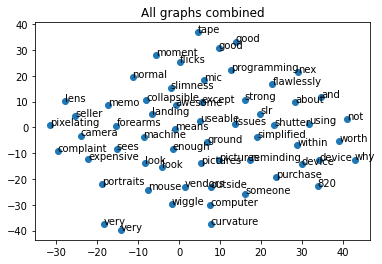